Utilizei Python 3 e as bibliotecas pandas, NumPy e Matplotlib.  Os códigos rodam no Jupyter Notebook. 

In [123]:
import pandas as pd

Aqui importo a biblioteca pandas e a nomeio como 'pd' para facilitar a digitação do código.

In [124]:
xls = pd.ExcelFile('SIC 584922017103.xlsx')

Como é um arquivo Excel, uso a classe ExcelFile e chamo o dataframe de "xls".

In [125]:
xls.sheet_names

['Base de Dados', 'Metodologia', 'Pedido', 'Campos da Tabela']

Verifico as tabelas que existem dentro do arquivo. Existem 4 e as que me interessaram foi "Base de Dados" e "Campos da Tabela".

In [126]:
xls.parse('Base de Dados')

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,...,DESCRICAO_DEFICIENCIA,DESCR_RELACIONAMENTO,FLAG_VITIMA_FATAL,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,NACIONALIDADE_PESSOA,NATURALIDADE_PESSOA
0,100217,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,ALTAIR,2019,4,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,...,NaN,NaN,NaN,F,43.0,Parda,PRENDAS DOMESTICAS,1 Grau completo,BRASILEIRA,ORLANDIA -SP
1,100217,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,ALTAIR,2019,4,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,...,NaN,NaN,NaN,F,19.0,Parda,ESTUDANTE,1 Grau completo,BRASILEIRA,NOVA GRANADA -SP
2,100217,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,ALTAIR,2019,4,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,...,NaN,NaN,NaN,F,43.0,Parda,PRENDAS DOMESTICAS,1 Grau completo,BRASILEIRA,ORLANDIA -SP
3,100217,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,ALTAIR,2019,4,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,...,NaN,NaN,NaN,F,19.0,Parda,ESTUDANTE,1 Grau completo,BRASILEIRA,NOVA GRANADA -SP
4,100217,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,ALTAIR,2019,12,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BARRETOS,DEL.POL.ALTAIR,...,NaN,NaN,NaN,F,43.0,Branca,PRENDAS DOMESTICAS,1 Grau incompleto,BRASILEIRA,NOSSA SENHORA GLORIA -SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57773,100912,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.PLANTÃO BEBEDOURO,VISTA ALEGRE DO ALTO,2019,391,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.VISTA ALEGRE DO ALTO,...,NaN,UNIAO ESTAVEL,N,F,27.0,Branca,LAVRADOR(A),1 Grau completo,BRASILEIRA,MORRO DO CHAPÉU/BA
57774,100912,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.PLANTÃO BEBEDOURO,VISTA ALEGRE DO ALTO,2019,391,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.VISTA ALEGRE DO ALTO,...,NaN,NENHUMA RELACAO,N,F,28.0,Parda,LAVRADOR(A),1 Grau incompleto,BRASILEIRA,BARRINHA -SP
57775,100912,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.PLANTÃO BEBEDOURO,VISTA ALEGRE DO ALTO,2019,391,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.VISTA ALEGRE DO ALTO,...,NaN,UNIAO ESTAVEL,N,F,27.0,Branca,LAVRADOR(A),1 Grau completo,BRASILEIRA,MORRO DO CHAPÉU/BA
57776,100912,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.PLANTÃO BEBEDOURO,VISTA ALEGRE DO ALTO,2019,620,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.BEBEDOURO,DEL.POL.VISTA ALEGRE DO ALTO,...,NaN,NaN,NaN,F,25.0,Branca,FISIOTERAPEUTA,Superior completo,BRASILEIRA,PIRANGI -SP


Comando para checar o que compõe a tabela "Base de Dados". É realmente o que eu preciso, mas são muitas colunas (53), então é necessário uma limpeza.

In [127]:
xls.parse('Campos da Tabela')

,A PRESENTE TABELA TEM POR FINALIDADE ESCLARECER OS CAMPOS CONTIDOS NA BASE DE DADOS,Unnamed: 1
0,*Resultado Null indica que o campo se encontra...,NaN
1,NaN,NaN
2,Campos,Descrição
3,NOME_DEPARTAMENTO,Departamento responsável pelo registro
4,NOME_SECCIONAL,Delegacia Seccional responsável pelo registro
5,NOME_DELEGACIA,Delegacia responsável pelo registro
6,CIDADE,Cidade de Registro
7,ANO_BO,Ano do BO
8,NUM_BO,Número do BO
9,NOME_DEPARTAMENTO_CIRC,Departamento de Circunscrição


A tabela "Campos da Tabela" mostra o que significa cada coluna, então ficará mais fácil para entender cada uma e filtrar o que é realmente necessário para a história que quero contar.

In [128]:
campos = pd.read_excel(xls, 'Campos da Tabela')

Criei um novo dataframe chamado "campos" somente com a tabela "Campos da Tabela", pois há muito espaço e dificultou a leitura de algumas linhas, então irei limpar.

In [129]:
campos.columns

Index(['A PRESENTE TABELA TEM POR FINALIDADE ESCLARECER OS CAMPOS CONTIDOS NA BASE DE DADOS', 'Unnamed: 1'], dtype='object')

Confirmei o nome das colunas. Como não foi especificado na tabela, foi usado a primeira linha como nome de cada coluna. 

In [130]:
campos = campos.rename(columns={'A PRESENTE TABELA TEM POR FINALIDADE ESCLARECER OS CAMPOS CONTIDOS NA BASE DE DADOS':'CAMPO'})
campos = campos.rename(columns={'Unnamed: 1':'DESCRIÇÃO'})
campos = campos.drop([0, 1, 2])

In [131]:
campos

,CAMPO,DESCRIÇÃO
3,NOME_DEPARTAMENTO,Departamento responsável pelo registro
4,NOME_SECCIONAL,Delegacia Seccional responsável pelo registro
5,NOME_DELEGACIA,Delegacia responsável pelo registro
6,CIDADE,Cidade de Registro
7,ANO_BO,Ano do BO
8,NUM_BO,Número do BO
9,NOME_DEPARTAMENTO_CIRC,Departamento de Circunscrição
10,NOME_SECCIONAL_CIRC,Seccional de Circunscrição
11,NOME_DELEGACIA_CIRC,Delegacia de Circunscrição
12,NOME_MUNICIPIO_CIRC,Município da Delegacia de Circunscrição


 Alterei o nome das colunas para algo mais amigável "CAMPO" e "DESCRIÇÃO" e retirei as três primeiras linhas da tabela.

In [132]:
df = pd.read_excel(xls, 'Base de Dados')

Criei um novo dataframe chamado "df" somente com a tabela "Base de Dados".

In [133]:
df.sample(5)

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,...,DESCRICAO_DEFICIENCIA,DESCR_RELACIONAMENTO,FLAG_VITIMA_FATAL,SEXO_PESSOA,IDADE_PESSOA,COR_CUTIS,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO,NACIONALIDADE_PESSOA,NATURALIDADE_PESSOA
39961,100431,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,DDM RIBEIRAO PRETO,RIBEIRAO PRETO,2019,2421,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,04º D.P. RIBEIRAO PRETO,...,NaN,NaN,NaN,F,18.0,Branca,ESTUDANTE,NaN,BRASILEIRA,SERRANA -SP
22874,60222,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.ARARAQUARA,DDM IBITINGA,IBITINGA,2019,344,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.ARARAQUARA,DEL.POL.IBITINGA,...,NaN,NaN,NaN,F,51.0,Branca,NAO INFORMADA,NaN,BRASILEIRA,IBITINGA -SP
28121,100410,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,DEL.POL.JARDINÓPOLIS,JARDINOPOLIS,2019,2751,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,DEL.POL.JARDINÓPOLIS,...,NaN,NaN,NaN,F,42.0,Branca,PROMOTOR(A),Superior completo,BRASILEIRA,S.PAULO -SP
8579,100402,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.SERTÃOZINHO,DEL.POL.BARRINHA,BARRINHA,2019,786,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.SERTÃOZINHO,DEL.POL.BARRINHA,...,NaN,NaN,NaN,F,6.0,Branca,ESTUDANTE,1 Grau incompleto,BRASILEIRA,SERTÃOZINHO-SP
12319,100404,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,DEL.POL.BRODOWSKI,BRODOWSKI,2019,1187,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,DEL.POL.BRODOWSKI,...,NaN,NaN,NaN,F,21.0,Branca,VENDEDOR(A),NaN,BRASILEIRA,BRODOWSKI -SP


Mesmo com a descrição de cada campo, algumas coisas eu ainda não consegui entender, então peguei 5 exemplos aleatórios para analisar o que cada um significa e selecionar melhor as colunas que desejo manter.

In [134]:
df = df[['CIDADE', 'DATA_COMUNICACAO_BO', 'FLAG_STATUS', 'VIOLENCIA_DOMESTICA', 'RUBRICA', 'DESCR_SUBTIPOLOCAL', 'DESCR_RELACIONAMENTO', 'IDADE_PESSOA', 'DESCR_PROFISSAO', 'DESCR_GRAU_INSTRUCAO']]

In [135]:
df.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
25354,ITAPOLIS,2019-10-04,Consumado,NaN,Lesão corporal (art. 129),PRAÇA-OUTROS,NaN,35.0,ZELADOR(A),1 Grau incompleto
15467,FRANCA,2019-01-03,Consumado,NaN,Ameaça (art. 147),CASA,NaN,62.0,NaN,NaN
17949,FRANCA,2020-06-29,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,CASAMENTO,27.0,NaN,NaN
36575,RESTINGA,2019-11-29,Consumado,NaN,Ameaça (art. 147),CASA,NaN,25.0,ESTUDANTE,NaN
20777,GUARA,2019-09-09,Consumado,NaN,A.I.-Lesão corporal (art. 129),VIA PÚBLICA-TRANSEUNTE,NaN,12.0,ESTUDANTE,1 Grau incompleto


Apenas com as colunas que desejo, fica mais fácil a análise dos dados. A forma como a idade está apresentada me incomoda um pouco, então vou corrigir.

In [136]:
df.dtypes

CIDADE                          object
DATA_COMUNICACAO_BO     datetime64[ns]
FLAG_STATUS                     object
VIOLENCIA_DOMESTICA             object
RUBRICA                         object
DESCR_SUBTIPOLOCAL              object
DESCR_RELACIONAMENTO            object
IDADE_PESSOA                   float64
DESCR_PROFISSAO                 object
DESCR_GRAU_INSTRUCAO            object
dtype: object

O tipo da coluna está como float, mas vou mudar para inteiro, já que ninguem diz "minha idade é 51,3".

In [137]:
import numpy as np

In [138]:
df['IDADE_PESSOA'] = df['IDADE_PESSOA'].fillna(0).astype(np.int64)

Importei a biblioteca numpy como "np" e fiz a mudança do tipo da coluna, colocando "0" nas que não apresentavam valores.

In [139]:
df.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
4169,ARARAQUARA,2020-02-10,Consumado,VIOLÊNCIA DOMESTICA,Injúria (art. 140),CASA,CASAMENTO,37,PORTEIRO(A),2 Grau completo
21329,GUARIBA,2019-01-28,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,UNIAO ESTAVEL,26,VENDEDOR(A),NaN
43487,RIBEIRAO PRETO,2019-08-02,Consumado,NaN,Ameaça (art. 147),CASA,NaN,46,CORRETOR(A) DE SEGUROS,2 Grau completo
20545,GUAIRA,2020-01-19,Consumado,NaN,"Dano qualificado (art. 163, par.único, I)",CASA,NaN,22,PRENDAS DOMESTICAS,NaN
15010,DOURADO,2019-10-23,Consumado,NaN,Lesão corporal (art. 129),ESTÁDIO/GINÁSIO-OUTROS,NaN,22,ESTUDANTE,Superior incompleto


In [140]:
df.to_csv('violencia-domestica-rp.csv', encoding='utf8', index=False)

É isso mesmo que quero, então aproveitei pra exportar a tabela caso eu queira utilizar novamente uma outra hora.

Como eu desejo falar especificamente do período da quarentena, preciso separar as datas por mês. A coluna "DATA_COMUNICACAO_BO" já está com o tipo correto, como vi anteriormente com o comando dtype, logo vai ser simples.

In [141]:
df2019 = df[df['DATA_COMUNICACAO_BO'].dt.year == 2019]

In [142]:
df2019.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
2985,ARARAQUARA,2019-08-16,Consumado,NaN,Ameaça (art. 147),VIA PÚBLICA,NaN,40,NaN,1 Grau incompleto
16830,FRANCA,2019-09-23,Consumado,NaN,Ameaça (art. 147),CASA,NaN,43,NaN,NaN
57772,VISTA ALEGRE DO ALTO,2019-05-27,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,ENVOLVIMENTO AMOROSO,44,ADMINISTRADOR DE EMPRESAS,Superior completo
16003,FRANCA,2019-04-09,Tentado,NaN,Ameaça (art. 147),CASA,NaN,22,BALCONISTA,NaN
10411,BEBEDOURO,2019-12-28,Consumado,NaN,Dano (art. 163),CASA,NaN,31,INSPETOR(A),Superior incompleto


Primeiro, separei por ano. Irei fazer o mesmo com 2020. Perceba que criei um novo dataframe chamado "df2019" para não sobreescrever as informações do outro dataframe, criando também um novo dataframe para 2020, chamado "df2020"

In [143]:
df2020 = df[df['DATA_COMUNICACAO_BO'].dt.year == 2020]

In [144]:
df2020.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
14296,CRAVINHOS,2020-04-08,Consumado,VIOLÊNCIA DOMESTICA,Lesão corporal de natureza 'GRAVÍSSIMA' (art....,VIA PÚBLICA,ENVOLVIMENTO AMOROSO,36,OPERADOR DE CAIXA,NaN
17585,FRANCA,2020-03-18,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),VIA PÚBLICA,ENVOLVIMENTO AMOROSO,28,PRENDAS DOMESTICAS,2 Grau completo
32845,OLIMPIA,2020-06-25,Consumado,NaN,Injúria (art. 140),LANCHONETE/PASTELARIA/PIZZARIA-OUTROS,NaN,31,NaN,NaN
50668,S.JOAQUIM DA BARRA,2020-03-17,Consumado,VIOLÊNCIA DOMESTICA,Lesão corporal (art 129 § 9º),CASA,ENVOLVIMENTO AMOROSO,20,ESTUDANTE,NaN
12803,CAJOBI,2020-06-22,Consumado,NaN,Difamação (art. 139),VIA PÚBLICA,NaN,53,NaN,2 Grau completo


In [145]:
df2019 = df2019.sort_values(by='DATA_COMUNICACAO_BO')
df2020 = df2020.sort_values(by='DATA_COMUNICACAO_BO')

In [146]:
df2019.tail(3)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
5526,ARARAQUARA,2019-12-31,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,PARENTESCO,56,PRENDAS DOMESTICAS,2 Grau completo
8107,BARRETOS,2019-12-31,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),APARTAMENTO,ENVOLVIMENTO AMOROSO,36,LAVRADOR(A),1 Grau incompleto
5530,ARARAQUARA,2019-12-31,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,PARENTESCO,79,APOSENTADO(A),Analfabeto


In [147]:
df2020.tail(3)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
41805,RIBEIRAO PRETO,2020-06-30,Consumado,NaN,Injúria (art. 140),APARTAMENTO,NaN,67,NaN,NaN
27304,JABOTICABAL,2020-06-30,Consumado,VIOLÊNCIA DOMESTICA,Injúria (art. 140),AREA COMUM-,UNIAO ESTAVEL,33,PRENDAS DOMESTICAS,2 Grau completo
27305,JABOTICABAL,2020-06-30,Consumado,NaN,Estupro de vulneravel (art.217-A),CASA,NaN,7,NaN,NaN


Primeiro, eu ordenei por data, do mês 1 ao 12. Depois, eu vi o final de cada uma para ver até qual mês iria. Como vai até o mês de julho na na tabela de 2020, farei o mesmo filtro na de 2019.

In [148]:
dfquar19 = df2019[(df2019['DATA_COMUNICACAO_BO'] >= '2019-03-01') & (df2019['DATA_COMUNICACAO_BO'] <= '2019-04-01')]

In [149]:
dfquar20 = df2020[(df2020['DATA_COMUNICACAO_BO'] >= '2020-03-01') & (df2020['DATA_COMUNICACAO_BO'] <= '2020-04-01')]

In [150]:
dfquar19.head(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
28677,MATAO,2019-03-01,Consumado,NaN,Dano (art. 163),CASA,NaN,59,NAO INFORMADA,Superior completo
1286,ARARAQUARA,2019-03-01,Consumado,NaN,Ameaça (art. 147),CASA,NaN,75,COSTUREIRO(A),1 Grau incompleto
52303,S.SIMAO,2019-03-01,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),VIA PÚBLICA,ENVOLVIMENTO AMOROSO,31,NaN,NaN
33170,ORLANDIA,2019-03-01,Consumado,NaN,Lesão corporal (art. 129),POSTO DE GASOLINA,NaN,24,DESEMPREGADO(A),2 Grau incompleto
1285,ARARAQUARA,2019-03-01,Consumado,NaN,Injúria (art. 140),PREFEITURA MUNICIPAL,NaN,29,FUNCION.PUBLICO MUNICIPAL,Superior completo


In [151]:
dfquar20.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
36281,PORTO FERREIRA,2020-03-22,Consumado,NaN,Ameaça (art. 147),CASA,NaN,40,NaN,NaN
41139,RIBEIRAO PRETO,2020-03-02,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,UNIAO ESTAVEL,31,AUXILIAR DE COBRANCA,Superior completo
24007,IBITINGA,2020-03-18,Consumado,NaN,Homicídio culposo na direção de veículo automo...,OUTROS,NaN,70,APOSENTADO(A),NaN
45581,RIBEIRAO PRETO,2020-03-12,Consumado,NaN,Dano (art. 163),APARTAMENTOS,NaN,43,MOTORISTA,2 Grau completo
21647,GUARIBA,2020-03-16,Consumado,NaN,Injúria (art. 140),AREA COMUM-,NaN,41,COMERCIANTE,1 Grau completo


Agora que tenho somente os meses que preciso, posso começar com minha matéria, fazendo a leitura dos dados nos dataframes específicos.

In [152]:
dfquar19.to_csv('quar19.csv', index=False, encoding ='utf8')
dfquar20.to_csv('quar20.csv', index=False, encoding ='utf8')

In [153]:
dfquar19.shape

(3704, 10)

In [154]:
dfquar20.shape

(2979, 10)

Usei o comando shape para ver a quantidade de linhas em cada tabela, estimando, assim, o total de casos de cada ano.

In [155]:
dfquar19['CIDADE'].unique()

array(['MATAO                                   ',
       'ARARAQUARA                              ',
       'S.SIMAO                                 ',
       'ORLANDIA                                ',
       'LUIS ANTONIO                            ',
       'MIGUELOPOLIS                            ',
       'PORTO FERREIRA                          ',
       'RIFAINA                                 ',
       'FRANCA                                  ',
       'CANDIDO RODRIGUES                       ',
       'GUAIRA                                  ',
       'CRAVINHOS                               ',
       'BATATAIS                                ',
       'BARRETOS                                ',
       'JARDINOPOLIS                            ',
       'COLOMBIA                                ',
       'S.ROSA DE VITERBO                       ',
       'MORRO AGUDO                             ',
       'IBITINGA                                ',
       'ITUVERAVA              

Preciso filtrar por cidade, então tenho que ter certeza que os nomes estão escritos corretamente. Há um grande espaço neles, portanto irei remove-los.

In [156]:
dfquar19['CIDADE'] = dfquar19['CIDADE'].map(str.strip)

<ipython-input-156-d0050541a4c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfquar19['CIDADE'] = dfquar19['CIDADE'].map(str.strip)


In [157]:
dfquar19['CIDADE'].unique()

array(['MATAO', 'ARARAQUARA', 'S.SIMAO', 'ORLANDIA', 'LUIS ANTONIO',
       'MIGUELOPOLIS', 'PORTO FERREIRA', 'RIFAINA', 'FRANCA',
       'CANDIDO RODRIGUES', 'GUAIRA', 'CRAVINHOS', 'BATATAIS', 'BARRETOS',
       'JARDINOPOLIS', 'COLOMBIA', 'S.ROSA DE VITERBO', 'MORRO AGUDO',
       'IBITINGA', 'ITUVERAVA', 'GUARA', 'BORBOREMA', 'OLIMPIA', 'ALTAIR',
       'PATROCINIO PAULISTA', 'RIBEIRAO PRETO', 'JABOTICABAL', 'S.CARLOS',
       'SERTAOZINHO', 'BARRINHA', 'ITAPOLIS', 'BEBEDOURO',
       'FERNANDO PRESTES', 'PONTAL', 'PEDREGULHO', 'BRODOWSKI', 'TAIACU',
       'IGARAPAVA', 'DOURADO', 'S.JOAQUIM DA BARRA', 'SERRANA',
       'MONTE ALTO', 'AMERICO BRASILIENSE', 'TAQUARITINGA', 'GUATAPARA',
       'PITANGUEIRAS', 'VIRADOURO', 'PIRANGI', 'MONTE AZUL PAULISTA',
       'TAIUVA', 'ALTINOPOLIS', 'S.LUCIA', 'DESCALVADO', 'DUMONT',
       'S.RITA PASSA QUATRO', 'CAJURU', 'GUARACI', 'GUARIBA',
       'SERRA AZUL', 'IBATE', 'IPUA', 'RIBEIRAO BONITO', 'NOVA EUROPA',
       'NUPORANGA', 'SALES OLIVE

Foi me dado um aviso, mas funcionou. Irei ignorar. Agora, filtrar.

In [158]:
dfquar19rp = dfquar19[dfquar19['CIDADE']=='RIBEIRAO PRETO']

In [159]:
dfquar19rp.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
37705,RIBEIRAO PRETO,2019-03-18,Consumado,VIOLÊNCIA DOMESTICA,Lesão corporal (art. 129),CASA,UNIAO ESTAVEL,51,NaN,2 Grau completo
37795,RIBEIRAO PRETO,2019-03-25,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,UNIAO ESTAVEL,38,DESEMPREGADO,1 Grau incompleto
37881,RIBEIRAO PRETO,2019-04-01,Consumado,NaN,Ameaça (art. 147),CASA,NaN,58,PRENDAS DOMESTICAS,1 Grau incompleto
37710,RIBEIRAO PRETO,2019-03-18,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,CONHECIDO,20,AUXILIAR DE ESCRITÓRIO,2 Grau completo
37741,RIBEIRAO PRETO,2019-03-19,Consumado,VIOLÊNCIA DOMESTICA,Lesão corporal (art. 129),CASA,ENVOLVIMENTO AMOROSO,22,ESTUDANTE,1 Grau completo


Na coluna "CIDADE", peço apenas as linhas que contenham "RIBEIRAO PRETO". Agora tenho somente os crimes cometidos em Ribeirão Preto. Irei fazer mais algumas filtragens, com o mesmo comando usado anteriormente, e também no dataframe dfquar20. Achei melhor separar os dataframes, colocando um "rp" na frente.

In [160]:
dfquar19rp.shape

(645, 10)

In [161]:
dfquar20['CIDADE'].unique()

array(['RIBEIRAO PRETO                          ',
       'MONTE AZUL PAULISTA                     ',
       'GUARIBA                                 ',
       'ITUVERAVA                               ',
       'BARRETOS                                ',
       'S.JOAQUIM DA BARRA                      ',
       'JARDINOPOLIS                            ',
       'SERTAOZINHO                             ',
       'CRAVINHOS                               ',
       'FRANCA                                  ',
       'IBITINGA                                ',
       'S.CARLOS                                ',
       'TAQUARITINGA                            ',
       'BATATAIS                                ',
       'ARARAQUARA                              ',
       'SERRANA                                 ',
       'PORTO FERREIRA                          ',
       'IGARAPAVA                               ',
       'RIBEIRAO BONITO                         ',
       'CAJOBI                 

In [162]:
dfquar20['CIDADE'] = dfquar20['CIDADE'].map(str.strip)

<ipython-input-162-f37ce8656960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfquar20['CIDADE'] = dfquar20['CIDADE'].map(str.strip)


In [163]:
dfquar20['CIDADE'].unique()

array(['RIBEIRAO PRETO', 'MONTE AZUL PAULISTA', 'GUARIBA', 'ITUVERAVA',
       'BARRETOS', 'S.JOAQUIM DA BARRA', 'JARDINOPOLIS', 'SERTAOZINHO',
       'CRAVINHOS', 'FRANCA', 'IBITINGA', 'S.CARLOS', 'TAQUARITINGA',
       'BATATAIS', 'ARARAQUARA', 'SERRANA', 'PORTO FERREIRA', 'IGARAPAVA',
       'RIBEIRAO BONITO', 'CAJOBI', 'JABOTICABAL', 'BEBEDOURO',
       'DESCALVADO', 'BOA ESPERANCA DO SUL', 'ITAPOLIS', 'COLOMBIA',
       'S.SIMAO', 'S.RITA PASSA QUATRO', 'PIRANGI', 'COLINA',
       'PATROCINIO PAULISTA', 'CRISTAIS PAULISTA', 'RINCAO',
       'VISTA ALEGRE DO ALTO', 'S.ANTONIO DA ALEGRIA', 'CAMPINAS',
       'CAJURU', 'IBATE', 'NUPORANGA', 'SEVERINIA', 'IPUA',
       'PITANGUEIRAS', 'FERNANDO PRESTES', 'MONTE ALTO', 'MATAO',
       'GUAIRA', 'GUARA', 'SERRA AZUL', 'LUIS ANTONIO', 'BARRINHA',
       'AMERICO BRASILIENSE', 'MIGUELOPOLIS', 'TABATINGA', 'JERIQUARA',
       'GUARACI', 'JABORANDI', 'PONTAL', 'S.JOSE DA BELA VISTA',
       'GUATAPARA', 'OLIMPIA', 'S.ROSA DE VITERBO', 'MORR

In [164]:
dfquar20rp = dfquar20[dfquar20['CIDADE']=='RIBEIRAO PRETO']

In [165]:
dfquar20rp.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
41179,RIBEIRAO PRETO,2020-03-05,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,CASAMENTO,38,AUXILIAR DE LIMPEZA,NaN
41256,RIBEIRAO PRETO,2020-03-12,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),VIA PÚBLICA,ENVOLVIMENTO AMOROSO,18,ESTUDANTE,NaN
45586,RIBEIRAO PRETO,2020-03-12,Consumado,NaN,Dano (art. 163),CASA,NaN,44,AUXILIAR DE LIMPEZA,2 Grau completo
41283,RIBEIRAO PRETO,2020-03-16,Consumado,VIOLÊNCIA DOMESTICA,Injúria (art. 140),CASA,PARENTESCO,35,PRENDAS DOMESTICAS,NaN
45562,RIBEIRAO PRETO,2020-03-10,Consumado,NaN,Violação de domicílio (art. 150),APARTAMENTO,NaN,61,ZELADOR(A),1 Grau completo


In [166]:
dfquar20rp.shape

(533, 10)

In [167]:
dfquar19rp['VIOLENCIA_DOMESTICA'].unique()

array([nan, 'VIOLÊNCIA DOMESTICA'], dtype=object)

In [168]:
dfquar19rpvd = dfquar19rp[dfquar19rp['VIOLENCIA_DOMESTICA']=='VIOLÊNCIA DOMESTICA']

In [169]:
dfquar19rpvd.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
37769,RIBEIRAO PRETO,2019-03-21,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,UNIAO ESTAVEL,54,FAXINEIRO(A),NaN
37888,RIBEIRAO PRETO,2019-04-01,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,UNIAO ESTAVEL,23,DESEMPREGADO(A),NaN
37777,RIBEIRAO PRETO,2019-03-21,Consumado,VIOLÊNCIA DOMESTICA,Injúria (art. 140),APARTAMENTOS,CASAMENTO,38,DECORADOR(A),Superior completo
37783,RIBEIRAO PRETO,2019-03-22,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,CASAMENTO,56,COMERCIANTE,2 Grau completo
37768,RIBEIRAO PRETO,2019-03-21,Consumado,VIOLÊNCIA DOMESTICA,Injúria (art. 140),CASA,UNIAO ESTAVEL,54,FAXINEIRO(A),NaN


In [170]:
dfquar19rpvd.shape

(290, 10)

In [171]:
dfquar20rp['VIOLENCIA_DOMESTICA'].unique()

array([nan, 'VIOLÊNCIA DOMESTICA'], dtype=object)

In [172]:
dfquar20rpvd = dfquar20rp[dfquar20rp['VIOLENCIA_DOMESTICA']=='VIOLÊNCIA DOMESTICA']

In [173]:
dfquar20rpvd.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,DESCR_RELACIONAMENTO,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
45639,RIBEIRAO PRETO,2020-03-17,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,ENVOLVIMENTO AMOROSO,33,ATENDENTE DE TELEMARKETING,2 Grau completo
45677,RIBEIRAO PRETO,2020-03-29,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,ENVOLVIMENTO AMOROSO,26,DESEMPREGADO,2 Grau completo
45606,RIBEIRAO PRETO,2020-03-14,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,PARENTESCO,44,NAO INFORMADA,NaN
41161,RIBEIRAO PRETO,2020-03-03,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,ENVOLVIMENTO AMOROSO,25,AUXILIAR DE COZINHA,2 Grau completo
41285,RIBEIRAO PRETO,2020-03-16,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,UNIAO ESTAVEL,44,ESTETICISTA,NaN


In [174]:
dfquar20rpvd.shape

(297, 10)

Filtrei também pelos crimes que se enquadravam como violência doméstica e criei um novo dataframe para cada nomeados "dfquar19rpvd" e "dfquar20rpvd". Faço assim para não sobreescrever os outros dataframes, caso precise de alguma informação que esteja neles.

In [175]:
dfquar19rpvd['DESCR_RELACIONAMENTO'].unique()

array(['CASAMENTO                               ',
       'CONHECIDO                               ',
       'UNIAO ESTAVEL                           ',
       'ENVOLVIMENTO AMOROSO                    ',
       'PARENTESCO                              ',
       'VIZINHANCA                              ',
       'NENHUMA RELACAO                         '], dtype=object)

In [176]:
dfquar19rpvd['DESCR_RELACIONAMENTO'] = dfquar19rpvd['DESCR_RELACIONAMENTO'].map(str.strip)

<ipython-input-176-e94ab5bfc7a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfquar19rpvd['DESCR_RELACIONAMENTO'] = dfquar19rpvd['DESCR_RELACIONAMENTO'].map(str.strip)


In [177]:
dfquar19rpvd['DESCR_RELACIONAMENTO'].unique()

array(['CASAMENTO', 'CONHECIDO', 'UNIAO ESTAVEL', 'ENVOLVIMENTO AMOROSO',
       'PARENTESCO', 'VIZINHANCA', 'NENHUMA RELACAO'], dtype=object)

In [178]:
dfquar19rpvd = dfquar19rpvd.set_index("DESCR_RELACIONAMENTO")

In [179]:
dfquar19rpvd = dfquar19rpvd.drop("CONHECIDO", axis=0)
dfquar19rpvd = dfquar19rpvd.drop("PARENTESCO", axis=0)
dfquar19rpvd = dfquar19rpvd.drop("VIZINHANCA", axis=0)
dfquar19rpvd = dfquar19rpvd.drop("NENHUMA RELACAO", axis=0)

In [180]:
dfquar19rpvd.sample(5)

,CIDADE,DATA_COMUNICACAO_BO,FLAG_STATUS,VIOLENCIA_DOMESTICA,RUBRICA,DESCR_SUBTIPOLOCAL,IDADE_PESSOA,DESCR_PROFISSAO,DESCR_GRAU_INSTRUCAO
DESCR_RELACIONAMENTO,,,,,,,,,
UNIAO ESTAVEL,RIBEIRAO PRETO,2019-03-23,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,49,AUTONOMO(A),1 Grau incompleto
UNIAO ESTAVEL,RIBEIRAO PRETO,2019-03-27,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,27,CAMAREIRO(A),1 Grau completo
ENVOLVIMENTO AMOROSO,RIBEIRAO PRETO,2019-03-09,Consumado,VIOLÊNCIA DOMESTICA,Injúria (art. 140),CASA,38,COMERCIANTE,Superior completo
UNIAO ESTAVEL,RIBEIRAO PRETO,2019-03-08,Consumado,VIOLÊNCIA DOMESTICA,Ameaça (art. 147),CASA,50,PRENDAS DOMESTICAS,NaN
UNIAO ESTAVEL,RIBEIRAO PRETO,2019-03-11,Consumado,VIOLÊNCIA DOMESTICA,Injúria (art. 140),CASA,41,APOSENTADO(A),NaN


In [181]:
dfquar19rpvd.shape

(239, 9)

Com estes comandos, eu transformei a coluna "DESCR_RELACIONAMENTO" em índice para facilitar a filtragem por linhas, selecionando apenas os registros onde a vítima tinha algum relacionamento amoroso com o agressor. Farei o mesmo com o dataframe "dfquar20rpvd"

In [182]:
dfquar20rpvd['DESCR_RELACIONAMENTO'].unique()

array(['CASAMENTO                               ',
       'UNIAO ESTAVEL                           ',
       'ENVOLVIMENTO AMOROSO                    ',
       'PARENTESCO                              ',
       'CONHECIDO                               ',
       'NENHUMA RELACAO                         ', nan], dtype=object)

In [183]:
dfquar20rpvd = dfquar20rpvd.dropna(subset=['DESCR_RELACIONAMENTO'])

In [184]:
dfquar20rpvd['DESCR_RELACIONAMENTO'] = dfquar20rpvd['DESCR_RELACIONAMENTO'].map(str.strip)

Por conter um valor NaN na coluna "DESCR_RELACIONAMENTO", eu não conseguiria remover os espaços. Então eu excluí as linhas com esse valor e depois os removi.

In [185]:
dfquar20rpvd = dfquar20rpvd.set_index("DESCR_RELACIONAMENTO")

In [186]:
dfquar20rpvd = dfquar20rpvd.drop("CONHECIDO", axis=0)
dfquar20rpvd = dfquar20rpvd.drop("PARENTESCO", axis=0)
dfquar20rpvd = dfquar20rpvd.drop("NENHUMA RELACAO", axis=0)

In [187]:
dfquar20rpvd.shape

(218, 9)

In [188]:
dfquar19rpvd = dfquar19rpvd.reset_index()
dfquar20rpvd = dfquar20rpvd.reset_index()

Voltei para o índice padrão nos dois dataframes.

In [189]:
import matplotlib.pyplot as plt

Importei a biblioteca Matplotlib e a chamei de plt. Ela serve para gerar visualizações.

In [190]:
dfquar19rpvd['IDADE_PESSOA'].value_counts()

35    17
32    12
21    11
22    11
38    10
27    10
40     9
46     9
24     9
41     8
29     7
31     7
51     6
39     6
28     6
37     6
44     6
25     6
23     6
54     5
42     5
33     5
49     5
34     5
30     4
20     4
68     4
47     4
50     4
48     3
26     3
53     3
55     3
58     3
17     3
36     2
43     2
45     2
52     2
19     2
18     2
64     1
56     1
Name: IDADE_PESSOA, dtype: int64

Qual a idade mais frequente na coluna "IDADE_PESSOA".

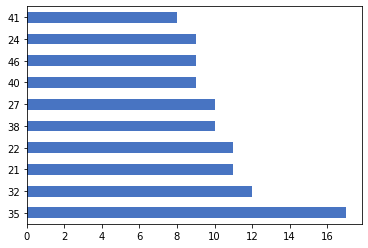

In [191]:
dfquar19rpvd['IDADE_PESSOA'].value_counts()[:10].plot.barh(color='#4874C2')

Gerei um pequeno gráfico com apenas os 10 primeiros valores mais frequentes.

In [192]:
dfquar20rpvd['IDADE_PESSOA'].value_counts()

40    17
33    13
36    12
38    12
34    10
22     9
31     9
42     9
44     8
24     8
23     7
32     7
45     7
35     7
47     6
18     5
29     5
46     5
21     4
41     4
43     4
17     4
57     4
59     4
27     4
49     4
28     3
25     3
0      3
30     3
39     3
50     3
63     2
37     2
54     2
26     1
53     1
20     1
19     1
55     1
64     1
Name: IDADE_PESSOA, dtype: int64

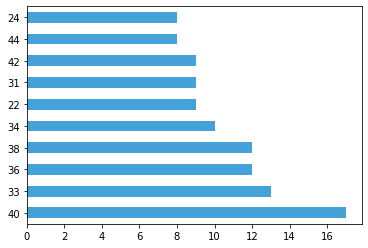

In [193]:
dfquar20rpvd['IDADE_PESSOA'].value_counts()[:10].plot.barh(color='#45A2D9')

O mesmo para o dataframe "dfquar20rpdv".

In [194]:
dfquar19rpvd['RUBRICA'].value_counts()

Ameaça (art. 147)                                            106
Injúria (art. 140)                                            65
Lesão corporal (art. 129)                                     42
Lesão corporal (art 129 § 9º)                                 11
Dano (art. 163)                                                6
Difamação (art. 139)                                           4
Homicídio qualificado (art. 121, §2o.)                         3
Art. 213 - Estupro                                             1
Lesão corporal  de natureza 'GRAVÍSSIMA' (art. 129, §2o.)      1
Name: RUBRICA, dtype: int64

In [196]:
dfquar20rpvd['RUBRICA'].value_counts()

Ameaça (art. 147)                104
Injúria (art. 140)                58
Lesão corporal (art. 129)         37
Dano (art. 163)                    5
Difamação (art. 139)               5
Lesão corporal (art 129 § 9º)      5
Calúnia (art. 138)                 3
Art. 213 - Estupro                 1
Name: RUBRICA, dtype: int64

O mesmo para "RUBRICA".

In [197]:
dfquar19rp['RUBRICA'].value_counts()

Ameaça (art. 147)                                            246
Injúria (art. 140)                                           166
Lesão corporal (art. 129)                                     97
Difamação (art. 139)                                          27
Dano (art. 163)                                               22
Lesão corporal (art 129 § 9º)                                 17
Estupro de vulneravel (art.217-A)                             10
Calúnia (art. 138)                                             9
Maus-tratos (art. 136)                                         9
Art. 213 - Estupro                                             9
Art. 215A - Importunação Sexual                                8
Violação de domicílio (art. 150)                               7
A.I.-Ameaça (art. 147)                                         6
Homicídio qualificado (art. 121, §2o.)                         3
A.I.-Injúria (art. 140)                                        3
A.I.-Lesão corporal (art.

In [198]:
dfquar20rp['RUBRICA'].value_counts()

Ameaça (art. 147)                                                240
Injúria (art. 140)                                               129
Lesão corporal (art. 129)                                         82
Difamação (art. 139)                                              21
Dano (art. 163)                                                   21
Lesão corporal (art 129 § 9º)                                     13
Calúnia (art. 138)                                                 5
Art. 215A - Importunação Sexual                                    4
A.I.-Ameaça (art. 147)                                             4
Estupro de vulneravel (art.217-A)                                  4
Maus-tratos (art. 136)                                             2
A.I.-Dano (art. 163)                                               2
Violação de domicílio (art. 150)                                   1
Art. 213 - Estupro                                                 1
Homicídio culposo na direção de ve

O mesmo no dataframe maior, para comparação.

In [199]:
dfquar19['DESCR_GRAU_INSTRUCAO'].value_counts()

2 Grau completo                             758
1 Grau incompleto                           435
1 Grau completo                             412
Superior completo                           352
2 Grau incompleto                           178
Superior incompleto                          95
Analfabeto                                   28
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

In [200]:
dfquar20['DESCR_GRAU_INSTRUCAO'].value_counts()

2 Grau completo                             552
1 Grau completo                             341
Superior completo                           316
1 Grau incompleto                           311
2 Grau incompleto                           152
Superior incompleto                          44
Analfabeto                                   12
Name: DESCR_GRAU_INSTRUCAO, dtype: int64

O grau de instrução.

Com os dados em mãos, vou gerar visualizações. Criarei um único dataframe com eles para facilitar. 

In [204]:
dados = [['Região 2019', 3704], ['Região 2020', 2979], ['Ribeirão Preto 2019', 645], ['Ribeirão Preto 2020', 533]] 

In [205]:
total = pd.DataFrame(dados, columns = ['Descrição', 'Quantidade']) 

In [206]:
total

,Descrição,Quantidade
0,Região 2019,3704
1,Região 2020,2979
2,Ribeirão Preto 2019,645
3,Ribeirão Preto 2020,533


In [207]:
total = total.set_index("Descrição")

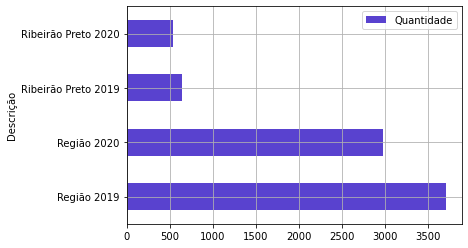

In [208]:
total.plot.barh(grid=True, color='#5942CF')

Parece complicado e lento, mas é muito mais prático utilizar apenas o teclado para criar uma tabala e não ter que ficar pulando células. Bom, eu criei uma variável chamada "dados" e dei uma descrição e o valor. Abaixo, criei duas colunas, "Descrição" e "Quantidade". Depois, transforei a "Descrição" em índice e, por fim, gerei a visualização. 

In [209]:
viodom = [['2019', 290], ['2020', 297]]

In [210]:
dfviodom = pd.DataFrame(viodom, columns = ['Ano', 'Quantidade']) 

In [211]:
dfviodom

,Ano,Quantidade
0,2019,290
1,2020,297


In [212]:
dfviodom = dfviodom.set_index("Ano")

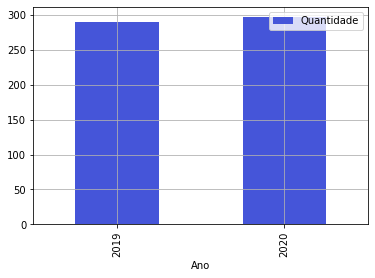

In [213]:
dfviodom.plot.bar(grid=True, color='#4555D9')

Aí o trabalho vai se repetindo e você pode montar o que desejar com os dados.